In [ ]:
# pip install --upgrade pip

In [ ]:
# pip install tensorflow

In [1]:
import os
os.listdir()

['.ipynb_checkpoints', 'challenging-fake-image-detection.ipynb', 'datasets']

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

datasets\input\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_100_1111.jpg
datasets\input\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_101_0010.jpg
datasets\input\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_102_0101.jpg
datasets\input\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_103_1111.jpg
datasets\input\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_104_1000.jpg
datasets\input\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_105_1100.jpg
datasets\input\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_106_0011.jpg
datasets\input\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_107_1011.jpg
datasets\input\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_108_1111.jpg
datasets\input\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_109_1111.jpg
datasets\input\real_and_fake_face_detection\real_a

**Importing necessary library**

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

**Installing tensorflow**

In [4]:
# !pip install tensorflow

**setting the image fixed size for training and intializing the batch size, channel and number of epochs**

In [4]:
Image_Size= 256
Batch_Size = 32
Channels=3
Epochs=50

**determining number of pics and classes**

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "datasets/input/real_and_fake_face_detection/real_and_fake_face",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size)

Found 2041 files belonging to 2 classes.


**present class name**

In [6]:
class_names = dataset.class_names
class_names

['training_fake', 'training_real']

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0]


**trying out for the first image**

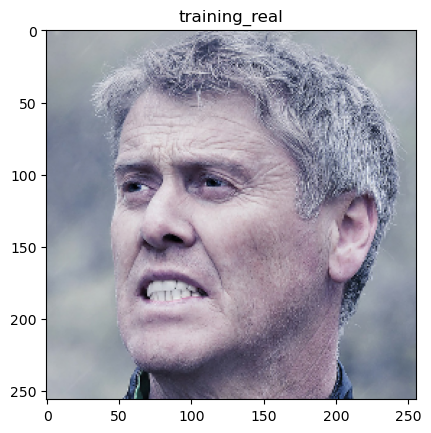

In [8]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

**creating function for splitting dataset**

In [9]:
def splitting_dataset_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size=len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split * ds_size)
    val_size= int(val_split * ds_size)

    train_ds= ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds=splitting_dataset_tf(dataset)

In [11]:
for i in train_ds:
    print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[226.      , 224.      , 237.      ],
         [226.      , 224.      , 237.      ],
         [226.      , 224.      , 237.      ],
         ...,
         [235.84375 , 226.64917 , 236.46875 ],
         [234.      , 223.96875 , 237.94775 ],
         [236.65112 , 230.29175 , 242.19458 ]],

        [[226.      , 224.      , 237.      ],
         [226.      , 224.      , 237.      ],
         [226.      , 224.      , 237.      ],
         ...,
         [250.98315 , 233.33691 , 229.5769  ],
         [243.95361 , 227.89136 , 230.95312 ],
         [222.25513 , 211.89575 , 217.63013 ]],

        [[226.      , 224.      , 237.      ],
         [226.      , 224.      , 237.      ],
         [226.      , 224.      , 237.      ],
         ...,
         [209.0625  , 193.42188 , 187.00415 ],
         [202.21875 , 185.21313 , 186.71313 ],
         [188.36938 , 175.54834 , 177.86938 ]],

        ...,

        [[211.24146 , 173.24146 

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[2.38548584e+02, 2.43548584e+02, 2.49548584e+02],
         [2.36625000e+02, 2.41625000e+02, 2.47593750e+02],
         [2.35390625e+02, 2.40390625e+02, 2.44390625e+02],
         ...,
         [2.41921875e+02, 2.42921875e+02, 2.47921875e+02],
         [2.43687500e+02, 2.44687500e+02, 2.49687500e+02],
         [2.45656250e+02, 2.46656250e+02, 2.51656250e+02]],

        [[2.37984375e+02, 2.42968750e+02, 2.49015625e+02],
         [2.36984131e+02, 2.41984131e+02, 2.47984131e+02],
         [2.37718750e+02, 2.42718750e+02, 2.48011230e+02],
         ...,
         [2.44937500e+02, 2.45937500e+02, 2.50937500e+02],
         [2.46031250e+02, 2.47031250e+02, 2.52031250e+02],
         [2.44984375e+02, 2.45984375e+02, 2.50984375e+02]],

        [[2.37000000e+02, 2.41000000e+02, 2.50000000e+02],
         [2.35609375e+02, 2.40255615e+02, 2.47316895e+02],
         [2.36258301e+02, 2.41258301e+02, 2.47258301e+02],
         ...,
         

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[248.77954  , 249.77954  , 243.77954  ],
         [250.       , 251.       , 245.       ],
         [249.2102   , 250.2102   , 244.2102   ],
         ...,
         [ 61.363525 ,  64.363525 ,  47.363525 ],
         [ 54.00537  ,  55.026367 ,  37.04712  ],
         [ 63.784668 ,  62.784668 ,  42.784668 ]],

        [[247.01562  , 246.96875  , 238.98438  ],
         [248.01562  , 247.96875  , 239.98438  ],
         [247.65625  , 247.60938  , 239.625    ],
         ...,
         [ 90.97754  ,  98.003174 ,  81.99878  ],
         [ 84.265625 ,  88.3125   ,  71.35889  ],
         [ 78.18237  ,  81.198    ,  62.229248 ]],

        [[246.3125   , 243.3125   , 234.3125   ],
         [247.64062  , 244.64062  , 235.64062  ],
         [246.64062  , 243.64062  , 234.64062  ],
         ...,
         [117.492676 , 127.261475 , 111.930176 ],
         [112.973145 , 120.723145 , 104.359375 ],
         [105.164795 , 112.164795 ,  94.6477

In [12]:
print(len(train_ds),len(val_ds),len(test_ds))

51 6 7


**Data Pipeline Optimization for Training, Validation, and Testing Datasets**

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

**Image Preprocessing for Resizing and Rescaling**

In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

**Data augmentation**

In [16]:
data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

**Building model architeture**

In [17]:
input_shape = (Batch_Size,Image_Size, Image_Size,Channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation= 'softmax'),

])

model.build(input_shape=input_shape)



In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming you have defined `resize_and_rescale` and `data_aug` functions

input_shape = (Batch_Size, Image_Size, Image_Size, Channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Build the model
model.build(input_shape=input_shape)

# Compile the model (you can customize optimizer, loss, and metrics)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                

**Model Compilation with Optimizer and Loss Function**

In [19]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

**Model Training with Training and Validation Data**

In [21]:
history = model.fit(
    train_ds,
    epochs= 20,
    batch_size=Batch_Size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
51/51 [==============================] - 65s 1s/step - loss: 0.7119 - accuracy: 0.4997 - val_loss: 0.7091 - val_accuracy: 0.5317
Epoch 2/20
51/51 [==============================] - 59s 1s/step - loss: 0.7037 - accuracy: 0.5182 - val_loss: 0.7009 - val_accuracy: 0.5317
Epoch 3/20
51/51 [==============================] - 60s 1s/step - loss: 0.7004 - accuracy: 0.5231 - val_loss: 0.6921 - val_accuracy: 0.5317
Epoch 4/20
51/51 [==============================] - 60s 1s/step - loss: 0.6976 - accuracy: 0.5218 - val_loss: 0.6903 - val_accuracy: 0.5317
Epoch 5/20
51/51 [==============================] - 60s 1s/step - loss: 0.6958 - accuracy: 0.5114 - val_loss: 0.6935 - val_accuracy: 0.5317
Epoch 6/20
51/51 [==============================] - 60s 1s/step - loss: 0.6937 - accuracy: 0.5243 - val_loss: 0.6913 - val_accuracy: 0.5132
Epoch 7/20
51/51 [==============================] - 60s 1s/step - loss: 0.6980 - accuracy: 0.5231 - val_loss: 0.6875 - val_accuracy: 0.5409
Epoch 8/20
51/51 [==

**Checking accuracy of the model**

In [22]:
scores = model.evaluate(test_ds)

51/51 [==============================] - 10s 201ms/step - loss: 0.6633 - accuracy: 0.6135


**Predicting Labels for a Batch of Images**

first image to predict
Actual label :  training_real
1/1 [==============================] - 0s 261ms/step
Pred label :  training_real


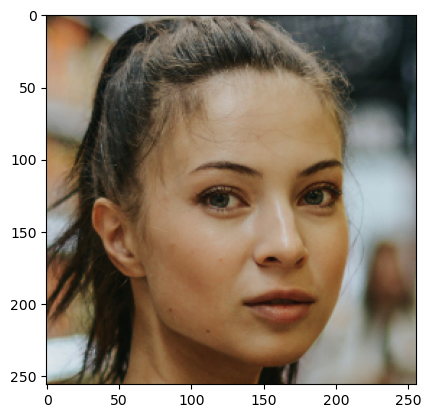

In [31]:
import numpy as np

for image_batch, label_batch in dataset.take(1):

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label : ",class_names[first_label])


    batch_pred = model.predict(image_batch)
    print("Pred label : ",class_names[np.argmax(batch_pred[0])])

**Image Prediction Function Using the Model**

In [28]:
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [25]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import numpy as np
import tensorflow as tf

# Load your model and define class_names if not defined already
# model = your_model
# class_names = your_class_names

def pred(model, img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

def browse_file():
    file_path = filedialog.askopenfilename()
    if file_path:
        predicted_class, confidence = pred(model, file_path)
        label.config(text=f"Predicted: {predicted_class} (Confidence: {confidence}%)")
        
        img = Image.open(file_path)
        img = img.resize((300, 300), Image.ANTIALIAS)
        img = ImageTk.PhotoImage(img)
        panel.img = img
        panel.config(image=img)

# GUI
root = tk.Tk()
root.title("Image Classifier")

frame = tk.Frame(root)
frame.pack(padx=10, pady=10)

browse_button = tk.Button(frame, text="Browse", command=browse_file)
browse_button.pack(side=tk.LEFT)

label = tk.Label(frame, text="")
label.pack(side=tk.BOTTOM)

panel = tk.Label(root)
panel.pack(padx=10, pady=10)

root.mainloop()


**Displaying Sample Predictions with Confidence**

1/1 [==============================] - 0s 49ms/step


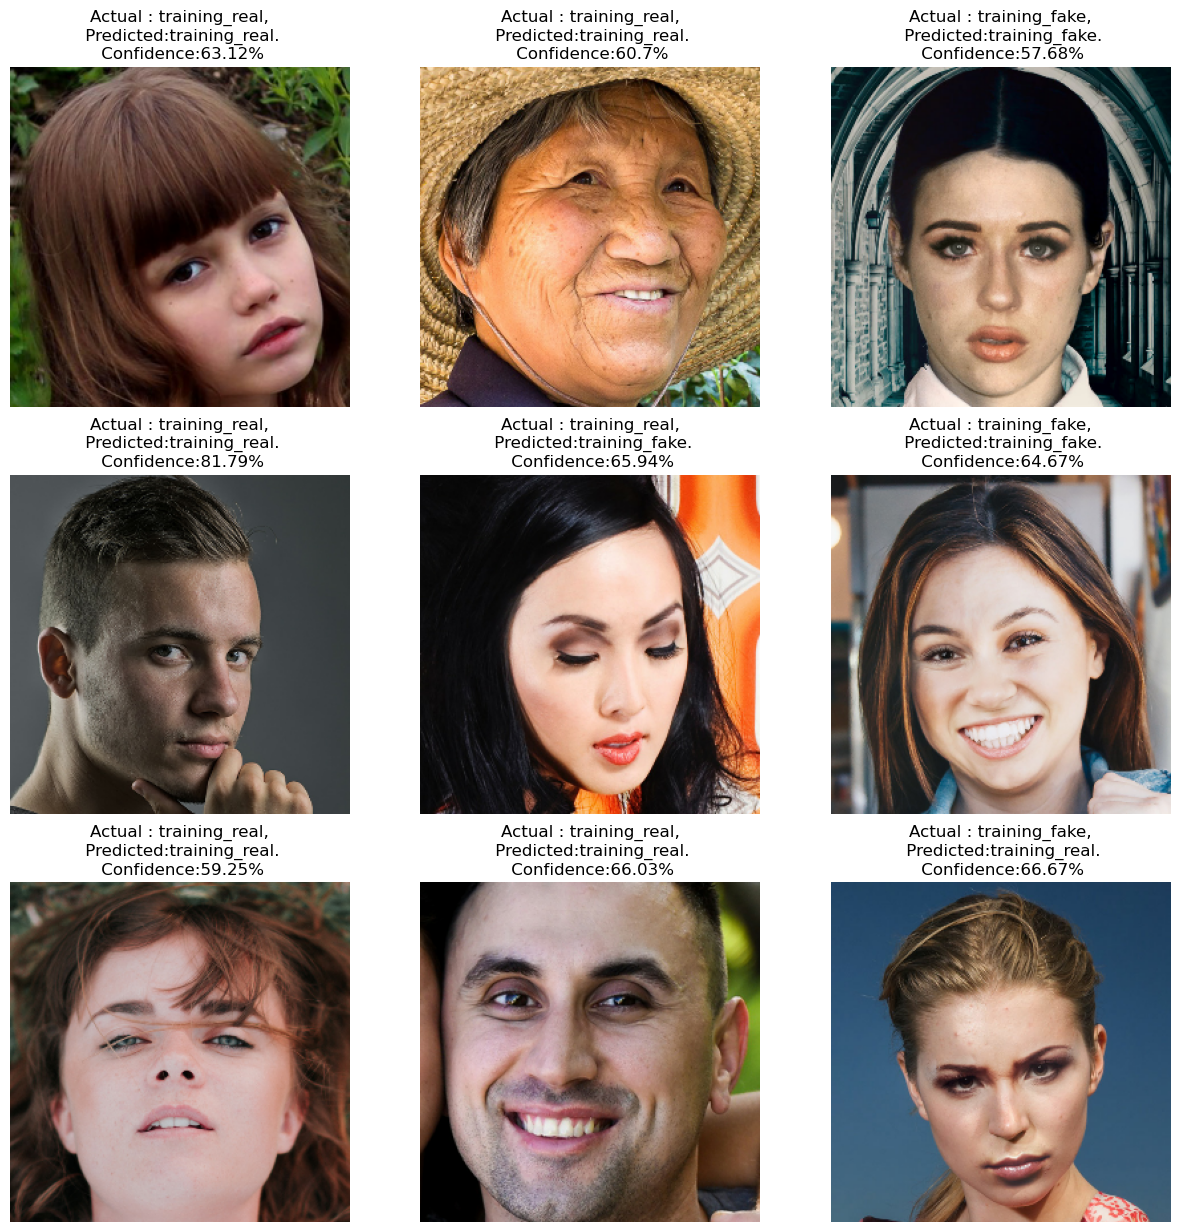

In [29]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = pred(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual : {actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")

        plt.axis("off")